Car Dekho - RE

Data Preprocessing

In [1]:
import pandas as pd
#load dataset
car_dekho=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset - extracted\extracted_dataset.xlsx')
car_dekho.shape

(8369, 243)

In [2]:
#check null value
car_dekho.isna().sum()

it                             0
ft                             0
bt                             4
km                             0
transmission                   0
                            ... 
Cargo Volumn                1593
Wheel Size                  2983
Alloy Wheel Size            2983
Ground Clearance Unladen    7854
location                       0
Length: 243, dtype: int64

In [3]:
#If a column has more than 50% null values, it might be reasonable to drop it, as it may not provide enough information for the model.
#Determine the threshold for null values based on the total number of rows in your dataset.
threshold=int(len(car_dekho)*0.5)
car_dekho.dropna(thresh=threshold,axis=1,inplace=True)
car_dekho.shape

(8369, 122)

In [4]:
#If a column has only one unique value, it may not provide useful information for your analysis or modeling,#Drop the column has 1 unique value
one_unique_columns=car_dekho.nunique()==1
car_dekho=car_dekho.drop(columns=car_dekho.columns[one_unique_columns])
car_dekho.shape

(8369, 59)

In [5]:
car_dekho.head(3)

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,location
0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,banglore
1,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,banglore
2,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,banglore


In [6]:
#check the duplicate rows 
car_dekho.duplicated().sum()

#drop duplicates
car_dekho.drop_duplicates(keep='first',inplace=True)
car_dekho.duplicated().sum()

np.int64(0)

Drop unwanted columns 

In [7]:
car_dekho.drop(columns=['Fuel Type','Kms Driven','Transmission','owner','Ownership'],axis=1,inplace=True)
car_dekho.drop(columns=['centralVariantId','Registration Year','Year of Manufacture'],axis=1,inplace=True)
car_dekho.drop(columns=['Seats.1','Seating Capacity','Engine Displacement','Engine'],axis=1,inplace=True)
car_dekho.drop(columns=['Max Power','Max Torque','Length','Width','Height','Value Configuration','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Values per Cylinder','Turning Radius','Top Speed','Acceleration','Cargo Volumn','Wheel Size','Alloy Wheel Size'],axis=1,inplace=True)
car_dekho.head(3)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,...,No,No,5 Speed,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,...,No,No,5 Speed,FWD,Power,Ventilated Disc,Drum,"Tubeless,Radial",4.0,banglore
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,...,No,No,5 Speed,FWD,Power,Disc,Drum,Tubeless,5.0,banglore


In [8]:
#dataset information
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8368
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8284 non-null   object 
 1   bt                  8280 non-null   object 
 2   km                  8284 non-null   object 
 3   transmission        8284 non-null   object 
 4   ownerNo             8284 non-null   int64  
 5   oem                 8284 non-null   object 
 6   model               8284 non-null   object 
 7   modelYear           8284 non-null   int64  
 8   variantName         8284 non-null   object 
 9   price               8284 non-null   object 
 10  Insurance Validity  8280 non-null   object 
 11  Seats               8278 non-null   object 
 12  RTO                 7410 non-null   object 
 13  Mileage             7999 non-null   object 
 14  Torque              8224 non-null   object 
 15  Color               8281 non-null   object 
 16  Engine Type

In [9]:
# Gear Box
def clean_numeric(value):
    if pd.isna(value):  # Check if the value is NaN
        return pd.NA  # Return NaN if value is NaN
    else:
        digit=''.join(filter(str.isdigit, str(value)))  # Extract digits only
        return int(digit) if digit else pd.NA
car_dekho['Gear Box']=car_dekho['Gear Box'].apply(clean_numeric)
car_dekho['Gear Box']=pd.to_numeric(car_dekho['Gear Box'],errors='coerce')
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,...,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [10]:
#Torque
def clean_floating(value):
    if pd.isna(value):
        return pd.NA
    else:
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', str(value)))  # Keep digits and decimal points
        return float(value) if value else pd.NA
car_dekho['Torque']=car_dekho['Torque'].apply(clean_floating)
car_dekho['Torque']=pd.to_numeric(car_dekho['Torque'],errors='coerce')
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,...,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [11]:
# Mileage
def clean_floating(value):
    if pd.isna(value):
        return pd.NA
    else:
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', str(value)))  # Keep digits and decimal points
        return float(value) if value else pd.NA
    
car_dekho['Mileage']=car_dekho['Mileage'].apply(clean_floating)
car_dekho['Mileage']=pd.to_numeric(car_dekho['Mileage'],errors='coerce')
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,...,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [12]:
#Seats               
def clean_numeric(value):
    if pd.isna(value):  # Check if the value is NaN
        return pd.NA  # Return NaN if value is NaN
    else:
        digit=''.join(filter(str.isdigit, str(value)))  # Extract digits only
        return int(digit) if digit else pd.NA
    
car_dekho['Seats']=car_dekho['Seats'].apply(clean_numeric)
car_dekho['Seats']=pd.to_numeric(car_dekho['Seats'],errors='coerce')
car_dekho['Seats'].dtype

dtype('float64')

In [13]:
#price

# Remove '₹' symbol
car_dekho['price'] = car_dekho['price'].str.replace('₹', '').str.strip()


# Convert 'Lakh' and 'Crore' to numeric values
#This function converts the string prices to numeric values. It handles 'Lakh', 'Crore', and regular numbers, converting them to the appropriate numeric format.

def convert_price(price):
    if 'Lakh' in price:
        return float(price.replace('Lakh', '').replace(',', '').strip()) * 100000
    elif 'Crore' in price:
        return float(price.replace('Crore', '').replace(',', '').strip()) * 10000000
    else:
        return float(price.replace(',', '').strip())

# Apply the conversion function
car_dekho['price'] = car_dekho['price'].apply(convert_price)

In [14]:
car_dekho.head(2)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,...,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,...,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless,Radial",4.0,banglore


In [15]:
#km
def clean_floating(value):
    if pd.isna(value):
        return pd.NA
    else:
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', str(value)))  # Keep digits and decimal points
        return float(value) if value else pd.NA
car_dekho['km']=car_dekho['km'].apply(clean_floating)
car_dekho.head(1)


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,...,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [16]:
car_dekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    6
RTO                    874
Mileage                285
Torque                  60
Color                    3
Engine Type            290
Displacement             4
No of Cylinder          31
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               324
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

In [242]:
copy_cardekho=car_dekho.copy()

Handle null values

In [134]:
numeric_columns=copy_cardekho.select_dtypes(include=['number'])
numeric_columns.head(5)

,km,ownerNo,modelYear,price,Seats,Mileage,Torque,Displacement,No of Cylinder,Gear Box,No Door Numbers
0,120000.0,3,2015,400000.0,5.0,23.10,90.00,998.0,3.0,5.0,5.0
1,32706.0,2,2018,811000.0,5.0,17.00,150.00,1497.0,3.0,5.0,4.0
2,11949.0,1,2018,585000.0,5.0,23.84,114.00,1199.0,3.0,5.0,5.0
3,17794.0,1,2014,462000.0,5.0,19.10,113.75,1197.0,4.0,5.0,4.0
4,60000.0,1,2015,790000.0,5.0,23.65,200.00,1248.0,4.0,5.0,5.0


In [135]:
mileage=copy_cardekho.loc[copy_cardekho['Mileage'].isna()]   #index[1759,4207,368,7388,4266]
mileage.sample(5)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
3151,Diesel,SUV,15000.0,Automatic,2,Mercedes-Benz,Mercedes-Benz GLE,2020,300d,7600000.0,Comprehensive,5.0,DL02,NaN,500.0,Silver,V Type Engine,1950.0,4.0,CRDI,Yes,No,9.0,AWD,Power,Ventilated Disc,Ventilated Disc,"Radial,Tubeless",5.0,delhi
5556,Petrol,SUV,10000.0,Automatic,1,Hyundai,Hyundai Creta,2022,SX Opt Turbo BSVI,1800000.0,Third Party insurance,5.0,TS08,NaN,242.0,Others,1.4 L Turbo GDi Petrol,1353.0,4.0,GDi,Yes,NaN,7.0,NaN,Power,Disc,Disc,"Tubeless, Radial",5.0,hyderabad
2136,Diesel,SUV,19000.0,Manual,1,Hyundai,Hyundai Creta,2022,E Diesel BSVI,1275000.0,Comprehensive,5.0,TN13,NaN,250.0,Black,1.5 L U2 CRDi Diesel,1493.0,4.0,CRDi,Yes,NaN,6.0,NaN,Power,Disc,Disc,"Tubeless, Radial",5.0,chennai
5707,Diesel,Pickup Trucks,20000.0,Manual,1,Mahindra,Mahindra Bolero Pik Up Extra Long,2020,FB 1.7T,850000.0,Third Party insurance,2.0,TS03,NaN,200.0,Others,m2DiCR 4 cly 2.5L TB,2523.0,4.0,NaN,Yes,NaN,51.0,RWD,NaN,Disc,Drum,NaN,2.0,hyderabad
3132,Petrol,SUV,11000.0,Automatic,1,Hyundai,Hyundai Creta,2022,SX Opt Turbo DCT,1975000.0,Comprehensive,5.0,DL5C,NaN,242.0,White,1.4 L Turbo GDi Petrol,1397.0,4.0,GDi,Yes,NaN,7.0,NaN,Power,Disc,Disc,"Tubeless, Radial",5.0,delhi


In [136]:
import numpy as np


<Axes: ylabel='Mileage'>

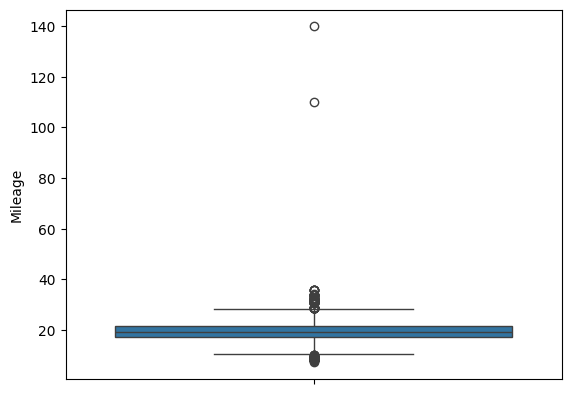

In [137]:
sns.boxplot(copy_cardekho['Mileage'])

In [138]:
upper_limit=copy_cardekho['Mileage'].mean()+3*copy_cardekho['Mileage'].std()
lower_limit=copy_cardekho['Mileage'].mean()-3*copy_cardekho['Mileage'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['Mileage']=np.where(copy_cardekho['Mileage']>upper_limit,upper_limit,copy_cardekho['Mileage'])
copy_cardekho['Mileage']=np.where(copy_cardekho['Mileage']<lower_limit,lower_limit,copy_cardekho['Mileage'])

31.365319369536092
7.162870404185622


<Axes: ylabel='Mileage'>

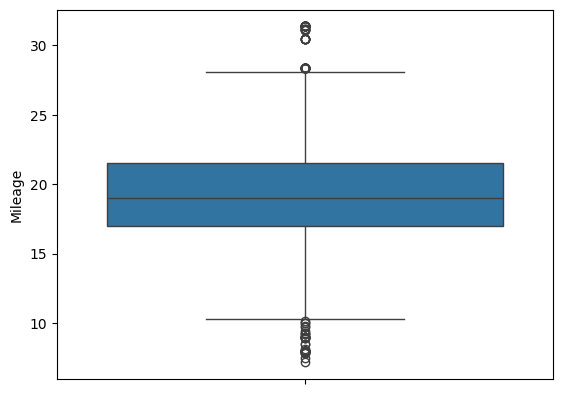

In [139]:
sns.boxplot(copy_cardekho['Mileage'])

use regression to fill the null values

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])


# Preparing Data
X_train = numeric_columns[numeric_columns['Mileage'].notna()].drop(['Mileage'], axis=1)
y_train = numeric_columns[numeric_columns['Mileage'].notna()]['Mileage']
X_test = numeric_columns[numeric_columns['Mileage'].isna()].drop(['Mileage'], axis=1)

# Train HistGradientBoostingRegressor model (no need to impute missing values)
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

# Predict missing Mileage values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['Mileage'].isnull(), 'Mileage'] = y_pred


In [142]:
copy_cardekho.iloc[[1759,4207,368,7388,4266]]

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
1776,Diesel,Sedan,90000.0,Manual,1,Maruti,Maruti Swift Dzire,2011,ZDi,350000.0,Third Party insurance,5.0,PY01,19.30,190.0,Others,In-Line Engine,1248.0,4.0,CRDI,Yes,No,5.0,2 WD,Power,Ventilated Disc,Drum,"Tubeless,Radial",4.0,chennai
4239,Petrol,Hatchback,70000.0,Manual,2,Honda,Honda Jazz,2015,1.2 V i VTEC,345000.0,Third Party insurance,5.0,DL4C,18.70,110.0,Gray,i-VTEC Petrol Engine,1199.0,4.0,PGM - Fi,No,No,5.0,FWD,Power,Disc,Drum,"Tubeless,Radial",5.0,delhi
374,Petrol,Sedan,14500.0,Manual,1,Honda,Honda City,2019,i-VTEC ZX,1100000.0,Third Party insurance,5.0,NaN,17.14,145.0,Grey,i VTEC Engine,1497.0,4.0,PGM-Fi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless,Radial",4.0,banglore
7465,Petrol,Hatchback,9473.0,Manual,1,Maruti,Maruti S-Presso,2021,VXI 2019-2022,414000.0,Comprehensive,5.0,Wb52,21.70,89.0,Red,K10C,998.0,3.0,NaN,NaN,NaN,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,kolkata
4298,Diesel,SUV,70000.0,Automatic,2,Ford,Ford Endeavour,2017,3.2 Titanium AT 4X4,2250000.0,Third Party insurance,7.0,NaN,10.91,470.0,Others,Diesel Engine,3198.0,4.0,TDCi,Yes,No,6.0,4WD,Power,Disc,Disc,"Tubeless,Radial",5.0,delhi


In [143]:
copy_cardekho['Mileage'].describe()

count    8284.000000
mean       19.127288
std         3.661399
min         7.162870
25%        17.000000
50%        18.900000
75%        21.400000
max        32.444498
Name: Mileage, dtype: float64

In [144]:
numeric_columns.isna().sum()

km                   0
ownerNo              0
modelYear            0
price                0
Seats                6
Mileage            285
Torque              60
Displacement         4
No of Cylinder      31
Gear Box           324
No Door Numbers     11
dtype: int64

In [145]:
# Select rows where 'Seats' is NaN and retrieve 'oem' and 'model' columns
nan_seats_info = copy_cardekho[copy_cardekho['Seats'].isna()][['oem', 'model']]
nan_seats_info


,oem,model
1175,Maruti,Maruti Estilo
3528,Nissan,Nissan Kicks
6211,Ford,Ford Endeavour
7608,Maruti,Maruti Estilo
7669,Maruti,Maruti Estilo
7745,Hindustan Motors,Ambassador


In [146]:
seats={'Maruti Estilo':5,'Nissan Kicks':5,'Ford Endeavour':7,'Ambassador':5}
copy_cardekho['Seats']=copy_cardekho['Seats'].fillna(copy_cardekho['model'].map(seats))

In [147]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                  60
Color                    3
Engine Type            290
Displacement             4
No of Cylinder          31
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               324
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

<Axes: ylabel='Torque'>

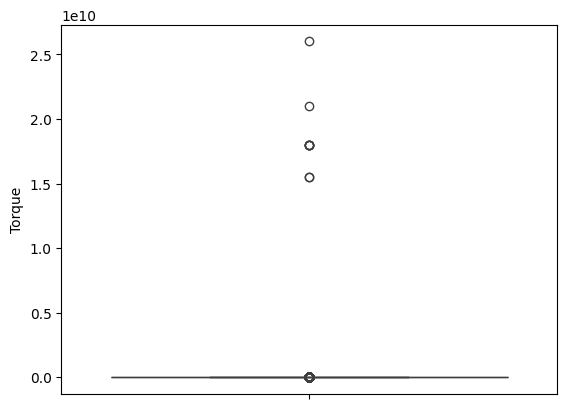

In [148]:
#Torque
sns.boxplot(copy_cardekho['Torque'])

In [ ]:
copy_cardekho['Torque'].sort_values(ascending=False).to_list()

In [150]:
#Torque
# Define a realistic upper limit for torque based on known data
upper_limit = 1000
lower_limit=copy_cardekho['Torque'].mean()-3*copy_cardekho['Torque'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['Torque']=np.where(copy_cardekho['Torque']>upper_limit,upper_limit,copy_cardekho['Torque'])
copy_cardekho['Torque']=np.where(copy_cardekho['Torque']<lower_limit,lower_limit,copy_cardekho['Torque'])

1000
-1856649338.440081


In [151]:
copy_cardekho['Torque'].describe()

count    8224.000000
mean      183.990002
std       129.762144
min         4.800000
25%       110.000000
50%       140.000000
75%       219.700000
max      1000.000000
Name: Torque, dtype: float64

<Axes: ylabel='Torque'>

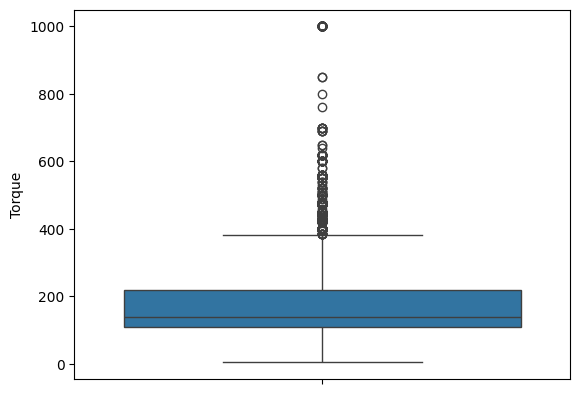

In [152]:
#Torque
sns.boxplot(copy_cardekho['Torque'])

In [153]:
# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])

# Preparing Data
X_train = numeric_columns[numeric_columns['Torque'].notna()].drop(['Torque'], axis=1)
y_train = numeric_columns[numeric_columns['Torque'].notna()]['Torque']
X_test = numeric_columns[numeric_columns['Torque'].isna()].drop(['Torque'], axis=1)

# Train HistGradientBoostingRegressor model
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

# Predict missing Torque values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['Torque'].isnull(), 'Torque'] = y_pred


In [154]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                   0
Color                    3
Engine Type            290
Displacement             4
No of Cylinder          31
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               324
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

In [155]:
pd.set_option('display.max_columns', None)
#Displacement
Displacement=copy_cardekho.loc[copy_cardekho['Displacement'].isna()]
Displacement

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
487,Petrol,SUV,10000.0,Manual,3,Maruti,Maruti Gypsy,1995,MG410W ST,400000.0,Third Party insurance,6.0,NaN,14.975066,268.911881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Power,NaN,NaN,"Tubeless,Radial",3.0,banglore
490,Petrol,SUV,10000.0,Manual,3,Maruti,Maruti Gypsy,1995,MG410W HT,400000.0,Third Party insurance,8.0,KA18,14.998614,253.405301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Power,NaN,NaN,"Tubeless,Radial",3.0,banglore
574,Electric,Hatchback,20000.0,Automatic,1,Mahindra,Mahindra e2o Plus,2017,P6,550000.0,Third Party insurance,4.0,KA03,31.365319,70.000000,Red,210AH Lithium Ion,NaN,4.0,3 Phase AC Induction Motors,No,No,NaN,FWD,Electric,Disc,Drum,"Tubeless, Radial",5.0,banglore
5510,Petrol,Sedan,135000.0,Manual,1,Mercedes-Benz,Mercedes-Benz C-Class,2002,180 elegance,225000.0,Third Party insurance,5.0,AP28,15.157386,387.340713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Power,NaN,NaN,"Tubeless,Radial",4.0,hyderabad


In [ ]:
pd.set_option('display.max_rows', None)
engine_displacement = copy_cardekho[['model','Displacement']]
engine_displacement.drop_duplicates()

In [157]:
displacement={'Maruti Gypsy':998,'Mahindra e2o Plus':0,'Mercedes-Benz C-Class':1950}
copy_cardekho['Displacement']=copy_cardekho['Displacement'].fillna(copy_cardekho['model'].map(displacement))


In [158]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                   0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder          31
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               324
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

In [ ]:
#No of Cylinder
no_of_clyinder=copy_cardekho.loc[copy_cardekho['No of Cylinder'].isna()]
no_of_clyinder

<Axes: ylabel='No of Cylinder'>

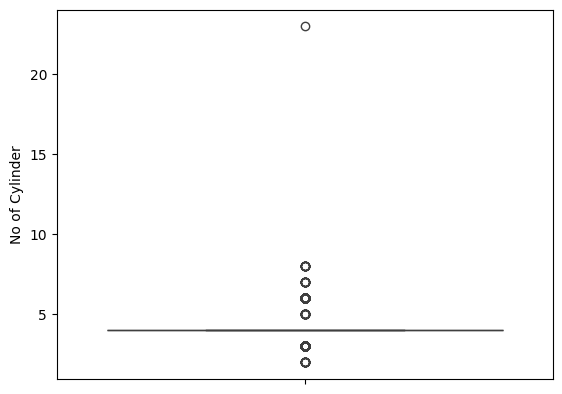

In [160]:
sns.boxplot(copy_cardekho['No of Cylinder'])

In [161]:
# Capping the 'No of Cylinder' column at a reasonable maximum value (e.g., 12)
upper_limit = 10
lower_limit=copy_cardekho['No of Cylinder'].mean()-3*copy_cardekho['No of Cylinder'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['No of Cylinder']=np.where(copy_cardekho['No of Cylinder']>upper_limit,upper_limit,copy_cardekho['No of Cylinder'])
copy_cardekho['No of Cylinder']=np.where(copy_cardekho['No of Cylinder']<lower_limit,lower_limit,copy_cardekho['No of Cylinder'])


10
2.0191293429910577


<Axes: ylabel='No of Cylinder'>

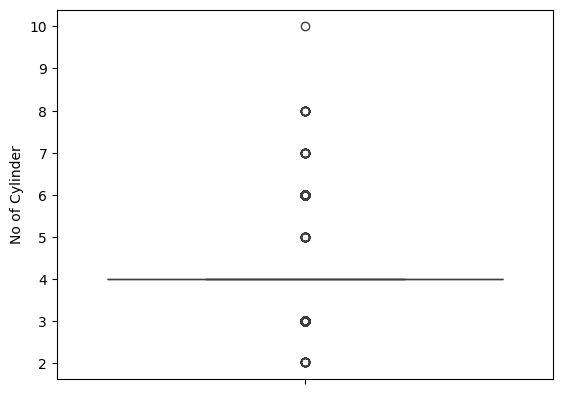

In [162]:
sns.boxplot(copy_cardekho['No of Cylinder'])

In [163]:
# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])


# Preparing Data
X_train = numeric_columns[numeric_columns['No of Cylinder'].notna()].drop(['No of Cylinder'], axis=1)
y_train = numeric_columns[numeric_columns['No of Cylinder'].notna()]['No of Cylinder']
X_test = numeric_columns[numeric_columns['No of Cylinder'].isna()].drop(['No of Cylinder'], axis=1)

# Train HistGradientBoostingRegressor model
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

# Predict missing Torque values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['No of Cylinder'].isnull(), 'No of Cylinder'] = y_pred

In [164]:
copy_cardekho['No of Cylinder']=copy_cardekho['No of Cylinder'].astype(int)

In [165]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                   0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder           0
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               324
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

In [ ]:
#Gear Box
gear_box=copy_cardekho.loc[copy_cardekho['Gear Box'].isna()].sample(10)
gear_box

In [ ]:
gear_box=copy_cardekho[copy_cardekho['Gear Box'].isna()]
gear_box_unique=copy_cardekho['model']
unique_model=gear_box_unique.unique()
unique_model

4.0
77.0


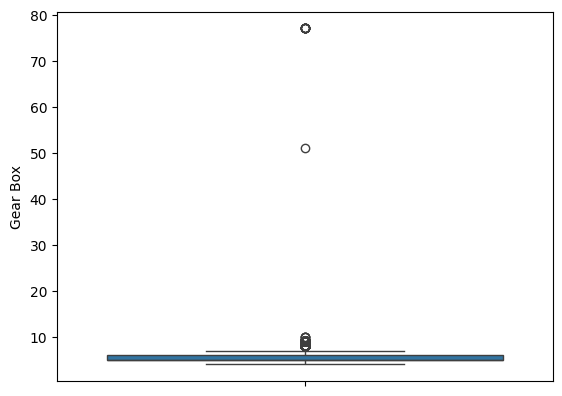

In [168]:
sns.boxplot(copy_cardekho['Gear Box'])
print(copy_cardekho['Gear Box'].min())
print(copy_cardekho['Gear Box'].max())

In [169]:
upper_limit = 10
lower_limit=copy_cardekho['Gear Box'].mean()-3*copy_cardekho['Gear Box'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['Gear Box']=np.where(copy_cardekho['Gear Box']>upper_limit,upper_limit,copy_cardekho['Gear Box'])
copy_cardekho['Gear Box']=np.where(copy_cardekho['Gear Box']<lower_limit,lower_limit,copy_cardekho['Gear Box'])
copy_cardekho['Gear Box'].describe()

10
-2.6671606334663513


count    7960.000000
mean        5.488819
std         0.951058
min         4.000000
25%         5.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: Gear Box, dtype: float64

<Axes: ylabel='Gear Box'>

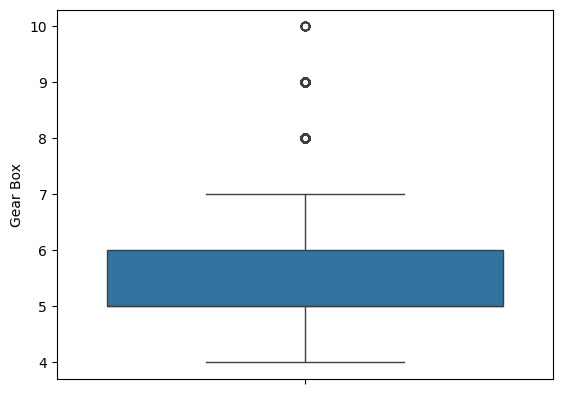

In [170]:
sns.boxplot(copy_cardekho['Gear Box'])

In [171]:
# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])


# Preparing Data
X_train = numeric_columns[numeric_columns['Gear Box'].notna()].drop(['Gear Box'], axis=1)
y_train = numeric_columns[numeric_columns['Gear Box'].notna()]['Gear Box']
X_test = numeric_columns[numeric_columns['Gear Box'].isna()].drop(['Gear Box'], axis=1)

# Train HistGradientBoostingRegressor model
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

# Predict missing Torque values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['Gear Box'].isnull(), 'Gear Box'] = y_pred

In [172]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                   0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder           0
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box                 0
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

In [173]:
copy_cardekho.loc[copy_cardekho['No Door Numbers'].isna()]

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
601,Electric,SUV,10000.0,Automatic,1,Tata,Tata Nexon EV Max,2023,XZ Plus Lux,1800000.0,Third Party insurance,5.0,KA02,17.464878,250.000000,Others,NaN,0.0,3,NaN,NaN,NaN,6.430632,NaN,Electric,Disc,Disc,NaN,NaN,banglore
1175,Petrol,Hatchback,40000.0,Manual,3,Maruti,Maruti Estilo,2009,LXI,200000.0,Third Party insurance,5.0,KA03,19.500000,96.751922,Others,NaN,1061.0,4,NaN,NaN,NaN,5.000423,NaN,NaN,NaN,NaN,NaN,NaN,banglore
3528,Petrol,SUV,60000.0,Manual,2,Nissan,Nissan Kicks,2019,Petrol,700000.0,Third Party insurance,5.0,DL3C,16.704253,142.000000,Gray,1.5 H4K Petrol,1498.0,4,MPFI,NaN,NaN,5.433961,NaN,NaN,NaN,NaN,NaN,NaN,delhi
4187,Petrol,SUV,1500.0,Automatic,1,Maruti,Maruti FRONX,2023,Zeta Turbo AT,1250000.0,Comprehensive,5.0,DL3C,20.010000,147.600000,White,1.0L Turbo Boosterjet,998.0,3,NaN,NaN,NaN,6.000000,NaN,Electric,Disc,Drum,"Tubeless, Radial",NaN,delhi
6211,Diesel,SUV,120000.0,Manual,2,Ford,Ford Endeavour,2008,3.0 4x4 Thunder Plus,390000.0,Third Party insurance,7.0,HR26,11.400000,396.241084,Black,NaN,2953.0,4,NaN,NaN,NaN,5.193002,NaN,NaN,NaN,NaN,NaN,NaN,jaipur
6310,Electric,SUV,4140.0,Automatic,0,Tata,Tata Nexon EV Max,2023,XZ Plus,1600000.0,Comprehensive,5.0,NaN,17.620815,250.000000,White,NaN,0.0,2,NaN,NaN,NaN,6.605870,NaN,Electric,Disc,Disc,NaN,NaN,jaipur
6526,Electric,SUV,26455.0,Automatic,1,Tata,Tata Nexon EV,2022,XZ Plus Lux,1400000.0,Not Available,5.0,RJ45,17.712810,250.000000,Grey,NaN,0.0,2,NaN,NaN,NaN,6.443447,NaN,Electric,Disc,Disc,NaN,NaN,jaipur
7608,Petrol,Hatchback,70000.0,Manual,2,Maruti,Maruti Estilo,2010,LXI,120000.0,Third Party insurance,5.0,NaN,19.500000,119.028946,Others,NaN,1061.0,4,NaN,NaN,NaN,4.986224,NaN,NaN,NaN,NaN,NaN,NaN,kolkata
7643,Petrol,Coupe,170.0,Automatic,1,BMW,BMW 3 Series Gran Limousine,2023,330Li M Sport BSVI,5895000.0,Third Party insurance,5.0,WB02,15.390000,400.000000,White,TwinPower Turbo,1998.0,4,NaN,NaN,NaN,8.000000,RWD,NaN,NaN,NaN,NaN,NaN,kolkata
7669,Petrol,Hatchback,50000.0,Manual,2,Maruti,Maruti Estilo,2009,LXI,120000.0,Third Party insurance,5.0,WB24,19.500000,115.061868,Gold,NaN,1061.0,4,NaN,NaN,NaN,4.986224,NaN,NaN,NaN,NaN,NaN,NaN,kolkata


In [174]:
doors={'Tata Nexon EV Max':5,'Maruti Estilo':5,'Nissan Kicks':5,'Maruti FRONX':5,'Ford Endeavour':5,'Tata Nexon EV Max':5,'Tata Nexon EV':5,'BMW 3 Series Gran Limousine':4,'Ambassador':4}
copy_cardekho['No Door Numbers']=copy_cardekho['No Door Numbers'].fillna(copy_cardekho['model'].map(doors))

In [175]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                   0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder           0
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box                 0
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers          0
location                 0
dtype: int64

(array([8.042e+03, 2.070e+02, 2.200e+01, 7.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([2.01610000e+04, 4.16814490e+06, 8.31612880e+06, 1.24641127e+07,
        1.66120966e+07, 2.07600805e+07, 2.49080644e+07, 2.90560483e+07,
        3.32040322e+07, 3.73520161e+07, 4.15000000e+07]),
 <BarContainer object of 10 artists>)

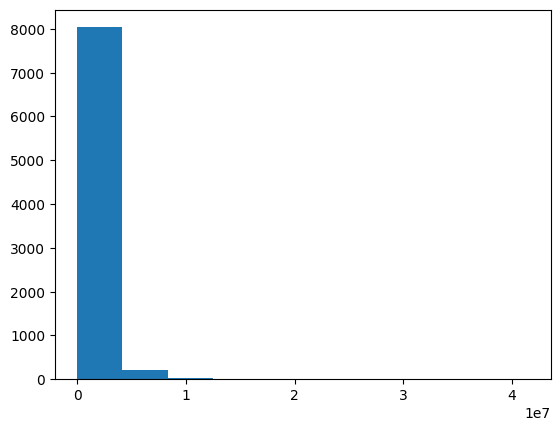

In [176]:
#price
plt.hist(copy_cardekho['price'])

<Axes: ylabel='price'>

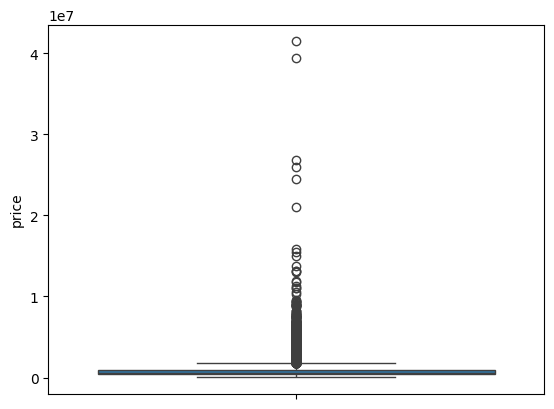

In [177]:
sns.boxplot(copy_cardekho['price'])

In [178]:
# Assuming df is your DataFrame and 'price' is the column you want to transform
copy_cardekho['price']= np.log(copy_cardekho['price'] + 1)  # Adding 1 to avoid log(0)

(array([  12.,   84.,  396., 1914., 3687., 1443.,  515.,  206.,   21.,
           6.]),
 array([ 9.91155492, 10.67451983, 11.43748474, 12.20044965, 12.96341456,
        13.72637947, 14.48934438, 15.25230928, 16.01527419, 16.7782391 ,
        17.54120401]),
 <BarContainer object of 10 artists>)

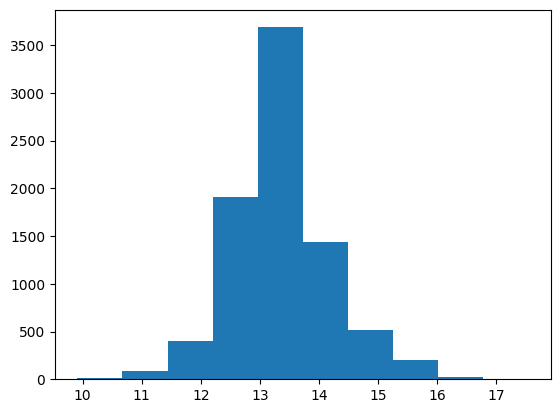

In [179]:
plt.hist(copy_cardekho['price'])

<Axes: ylabel='price'>

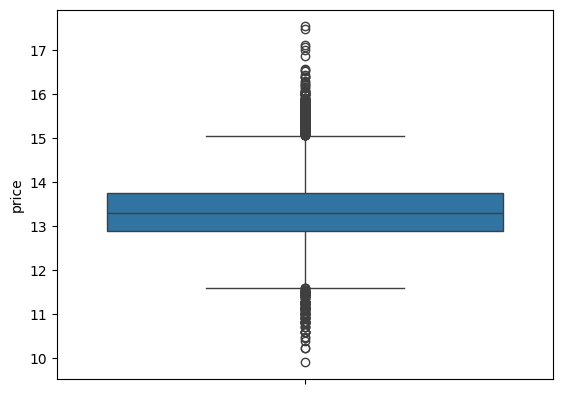

In [180]:
sns.boxplot(copy_cardekho['price'])

In [ ]:
copy_cardekho['price']

In [182]:
print(copy_cardekho['price'].min())
print(copy_cardekho['price'].mean())
print(copy_cardekho['price'].median())
print(copy_cardekho['price'].max())

9.911554923613886
13.367508435541586
13.308014385419147
17.541204009297314


<Axes: ylabel='km'>

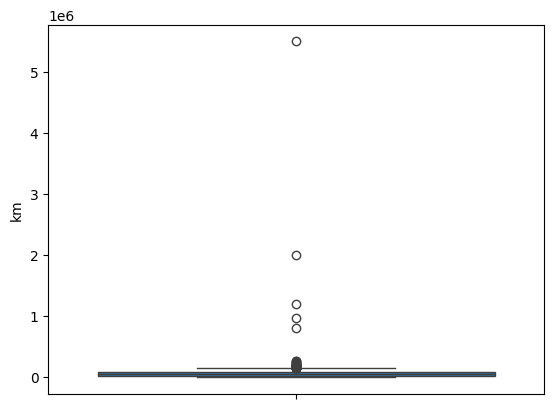

In [183]:
#km
sns.boxplot(copy_cardekho['km'])

In [184]:
copy_cardekho['km'].sort_values(ascending=False)

1539    5500000.0
2679    2000022.0
1996    1200000.0
7610     975000.0
1538     800000.0
4594     260000.0
7107     260000.0
6600     251066.0
5159     236000.0
3443     230000.0
2317     222996.0
6500     208978.0
6601     208708.0
6608     201161.0
1946     200300.0
336      199000.0
6438     191867.0
4543     188058.0
5930     188000.0
6628     183619.0
6579     182946.0
1234     180000.0
7200     177000.0
2348     176801.0
6545     176550.0
2438     175000.0
6643     174077.0
333      174000.0
1282     174000.0
4999     171000.0
1285     170402.0
6096     170000.0
1403     169219.0
2457     167332.0
6516     164910.0
304      164000.0
1751     162049.0
1230     162000.0
2608     161471.0
6657     160351.0
6620     160145.0
2263     158945.0
6651     158924.0
4529     158000.0
6445     157312.0
1301     157000.0
5120     156126.0
1476     156039.0
2574     154931.0
6638     153007.0
6467     152783.0
6570     152702.0
6503     152633.0
6459     152098.0
7086     152000.0
4867     1

In [185]:
# Replace all 0 values in 'km' column with 101
copy_cardekho['km'] = copy_cardekho['km'].replace(0, 101.0)

In [186]:
upper_limit = 260000
lower_limit=copy_cardekho['km'].mean()-3*copy_cardekho['km'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['km']=np.where(copy_cardekho['km']>upper_limit,upper_limit,copy_cardekho['km'])
copy_cardekho['km']=np.where(copy_cardekho['km']<lower_limit,lower_limit,copy_cardekho['km'])
copy_cardekho['km'].describe()

260000
-164069.28495347168


count      8284.000000
mean      57859.043337
std       34591.409853
min         101.000000
25%       30000.000000
50%       53696.000000
75%       80000.000000
max      260000.000000
Name: km, dtype: float64

<Axes: ylabel='km'>

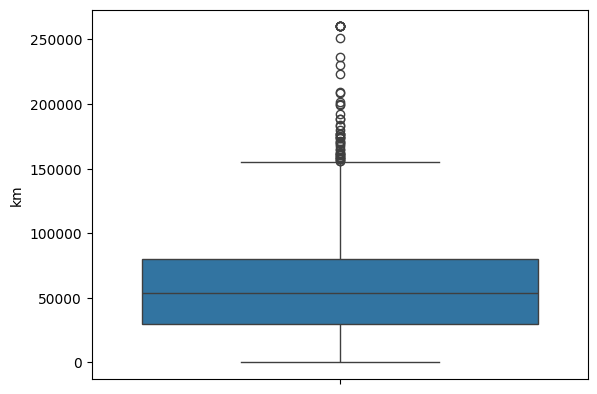

In [187]:
sns.boxplot(copy_cardekho['km'])

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

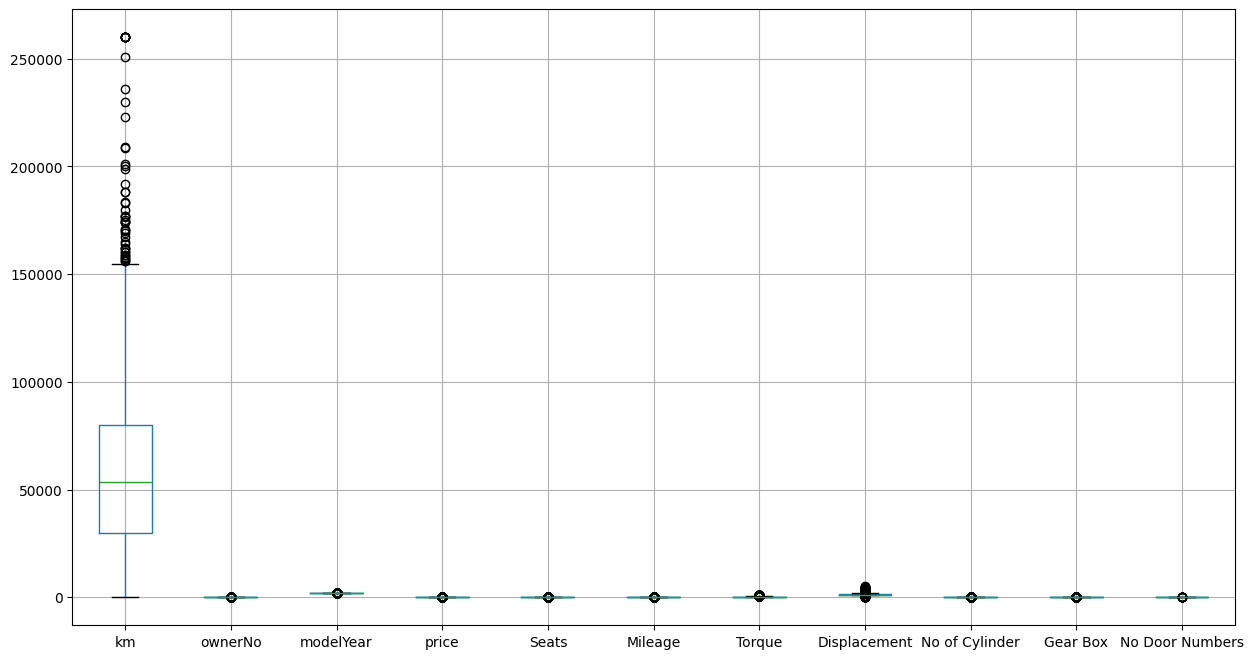

In [189]:
#after removing outlier
copy_cardekho.boxplot(figsize=(15,8))

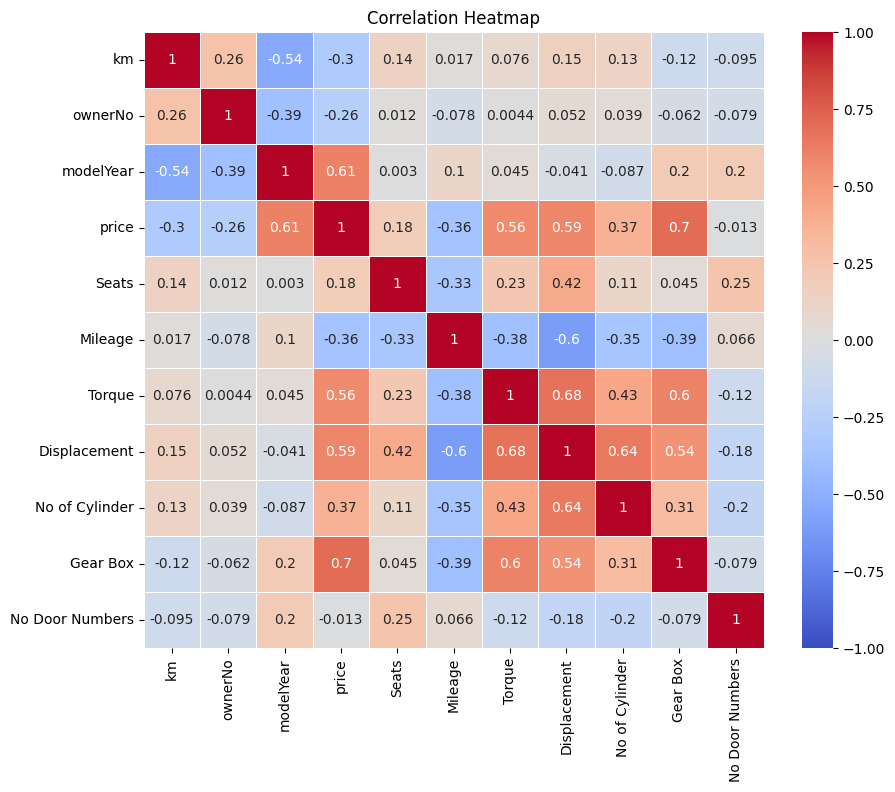

price              1.000000
Gear Box           0.695542
modelYear          0.612722
Displacement       0.590493
Torque             0.563099
No of Cylinder     0.374365
Seats              0.181322
No Door Numbers   -0.012719
ownerNo           -0.258700
km                -0.304249
Mileage           -0.362833
Name: price, dtype: float64


In [190]:
# Select numerical columns and compute the correlation matrix
correlation = copy_cardekho.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract the correlation of 'price' with other numerical features
correlation_with_price = correlation['price'].sort_values(ascending=False)
print(correlation_with_price)


Correlation check for numerical values

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4884\2721259008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')


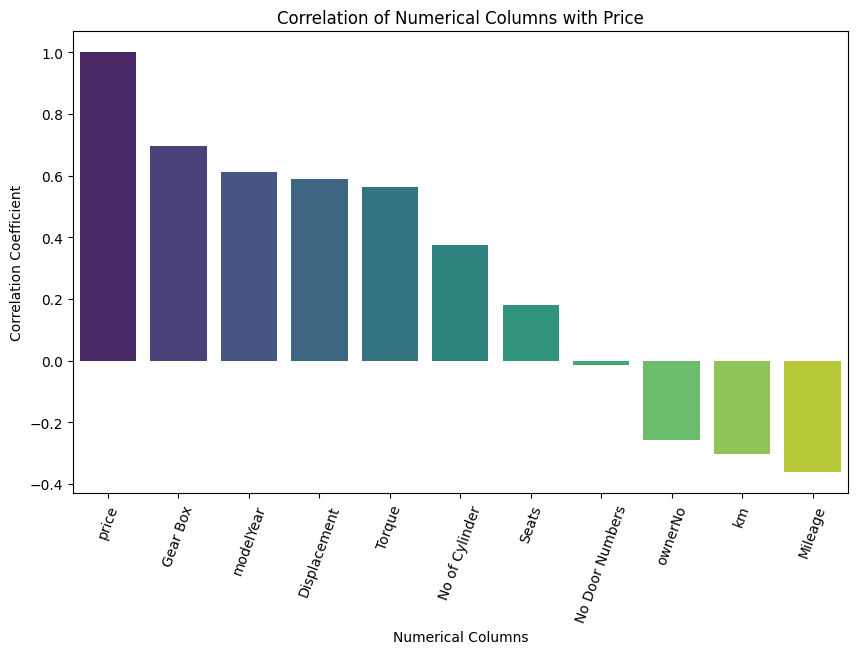

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')
plt.title('Correlation of Numerical Columns with Price')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=70)
plt.show()

In [192]:
numeric_columns.drop(['Seats','No Door Numbers','No of Cylinder','ownerNo','Mileage'],axis=1, inplace=True)


In [193]:
numeric_columns.head(1)

,km,modelYear,price,Torque,Displacement,Gear Box
0,120000.0,2015,400000.0,90.0,998.0,5.0


Categorical column

In [194]:
copy_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8368
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8284 non-null   object 
 1   bt                  8280 non-null   object 
 2   km                  8284 non-null   float64
 3   transmission        8284 non-null   object 
 4   ownerNo             8284 non-null   int64  
 5   oem                 8284 non-null   object 
 6   model               8284 non-null   object 
 7   modelYear           8284 non-null   int64  
 8   variantName         8284 non-null   object 
 9   price               8284 non-null   float64
 10  Insurance Validity  8280 non-null   object 
 11  Seats               8284 non-null   float64
 12  RTO                 7410 non-null   object 
 13  Mileage             8284 non-null   float64
 14  Torque              8284 non-null   float64
 15  Color               8281 non-null   object 
 16  Engine Type

In [195]:
categorical_columns=copy_cardekho.select_dtypes(include=['object'])
categorical_columns.head(2)

,ft,bt,transmission,oem,model,variantName,Insurance Validity,RTO,Color,Engine Type,Fuel Suppy System,Turbo Charger,Super Charger,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,location
0,Petrol,Hatchback,Manual,Maruti,Maruti Celerio,VXI,Third Party insurance,KA51,White,K10B Engine,MPFi,No,No,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",banglore
1,Petrol,SUV,Manual,Ford,Ford Ecosport,1.5 Petrol Titanium BSIV,Comprehensive,KA05,White,Ti-VCT Petrol Engine,Direct Injection,No,No,FWD,Power,Ventilated Disc,Drum,"Tubeless,Radial",banglore


In [196]:
copy_cardekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    0
RTO                    874
Mileage                  0
Torque                   0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder           0
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box                 0
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers          0
location                 0
dtype: int64

In [ ]:
#RTO 
copy_cardekho['RTO'].unique()

In [198]:
# Function to map RTO values
def map_rto(rto):
    if pd.isna(rto):
        return 'Unknown'
    rto_alpha = ''.join([char for char in str(rto) if char.isalpha()])  # Extract only letters
    return rto_alpha

copy_cardekho['RTO'] = copy_cardekho['RTO'].apply(map_rto)


In [199]:
copy_cardekho['RTO'].unique()

array(['KA', 'Unknown', 'OD', 'HR', 'WB', 'PY', 'TN', 'MH', 'KL', 'DL',
       'UP', 'AP', 'DLC', 'VK', 'MP', 'GJ', 'RJ', 'CH', 'JH', 'TS', 'HP',
       'OR', 'TM', 'DLX', 'Up', 'UK', 'PH', 'Hr', 'DDL', 'PB', 'DLZ',
       'DLF', 'AS', 'DLV', 'DLP', 'Dl', 'DLU', 'CG', 'DLB', 'DLA', 'DD',
       'GA', 'TA', 'TT', 'KK', 'AA', 'TD', 'BH', 'HE', 'RR', 'RH', 'RC',
       'RJG', 'BRF', 'AR', 'Wb', 'wb', 'WW', 'AN', 'wB', 'BR'],
      dtype=object)

In [200]:
rto_mapping_updated = {
    'KA': 'Karnataka',
    'HR': 'Haryana',
    'WB': 'West Bengal',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'RJ': 'Rajasthan',
    'AP': 'Andhra Pradesh',
    'GJ': 'Gujarat',
    'OD': 'Odisha',
    'PY': 'Puducherry',
    'CH': 'Chandigarh',
    'JH': 'Jharkhand',
    'TS': 'Telangana',
    'HP': 'Himachal Pradesh',
    'UK': 'Uttarakhand',
    'MP': 'Madhya Pradesh',
    'PB': 'Punjab',
    'AS': 'Assam',
    'CG': 'Chhattisgarh',
    'GA': 'Goa',
    'BR': 'Bihar',
    'AN': 'Andaman and Nicobar Islands',
    'AR': 'Arunachal Pradesh',
    'VK': 'Unknown',
    'TM': 'Tamil Nadu',  # Assumed
    'DLC': 'Delhi',
    'DLX': 'Delhi',
    'DLZ': 'Delhi',
    'DLF': 'Delhi',
    'DLP': 'Delhi',
    'DLU': 'Delhi',
    'DLB': 'Delhi',
    'DLA': 'Delhi',
    'DDL': 'Delhi',
    'Up': 'Uttar Pradesh',
    'PH': 'Unknown',
    'HE': 'Unknown',
    'RR': 'Unknown',
    'RH': 'Unknown',
    'RC': 'Unknown',
    'TT': 'Unknown',
    'TA': 'Unknown',
    'KK': 'Unknown',
    'AA': 'Unknown',
    'TD': 'Unknown',
    'RJG': 'Rajasthan',
    'BRF': 'Bihar',
    'WW': 'Unknown',
    'wB': 'West Bengal',
    'Wb': 'West Bengal',
    'wb': 'West Bengal',
    'Unknown': 'Unknown'
}

# Applying the updated mapping to the RTO column
copy_cardekho['RTO'] = copy_cardekho['RTO'].map(rto_mapping_updated).fillna('Unknown')
copy_cardekho['RTO'].unique()


array(['Karnataka', 'Unknown', 'Odisha', 'Haryana', 'West Bengal',
       'Puducherry', 'Tamil Nadu', 'Maharashtra', 'Delhi',
       'Uttar Pradesh', 'Andhra Pradesh', 'Madhya Pradesh', 'Gujarat',
       'Rajasthan', 'Chandigarh', 'Jharkhand', 'Telangana',
       'Himachal Pradesh', 'Uttarakhand', 'Punjab', 'Assam',
       'Chhattisgarh', 'Goa', 'Bihar', 'Arunachal Pradesh',
       'Andaman and Nicobar Islands'], dtype=object)

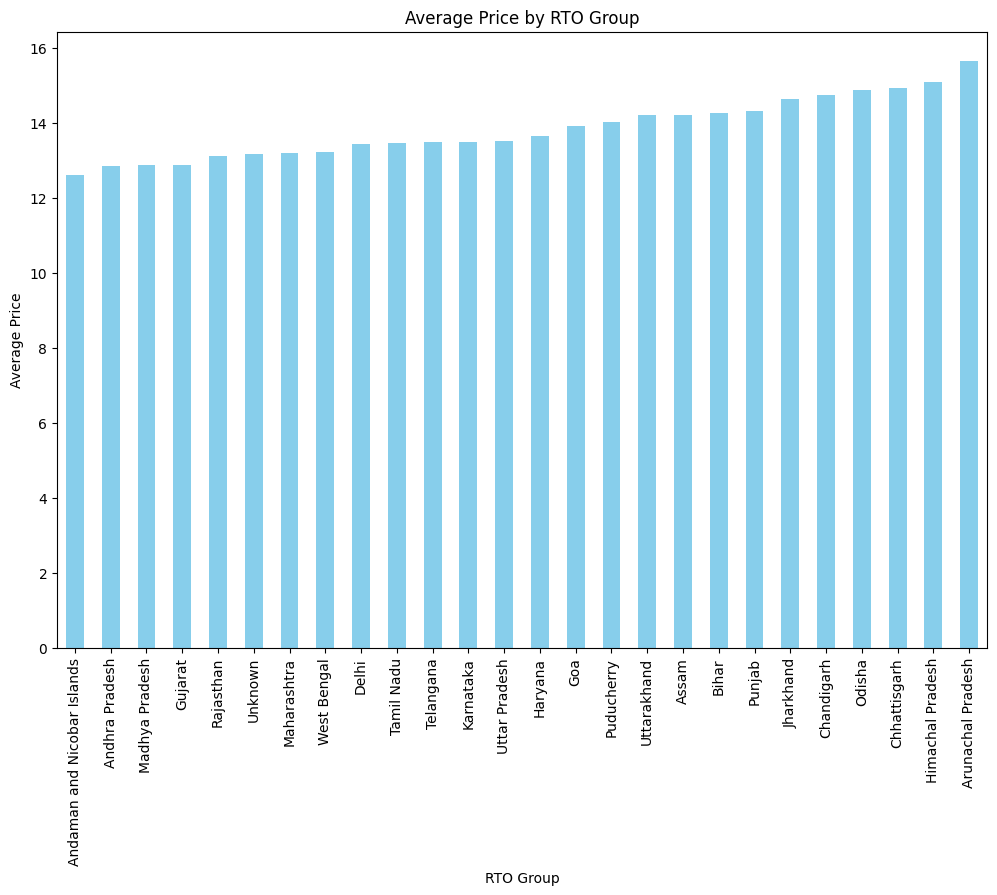

In [201]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('RTO')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by RTO Group')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

In [257]:
copy_cardekho.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'variantName', 'price', 'Insurance Validity', 'Seats',
       'RTO', 'Mileage', 'Torque', 'Color', 'Engine Type', 'Displacement',
       'No of Cylinder', 'Fuel Suppy System', 'Turbo Charger', 'Gear Box',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'No Door Numbers', 'location'],
      dtype='object')

Tyre Type

In [265]:
print('null values:',copy_cardekho['Tyre Type'].isna().sum())
print('unique values:',copy_cardekho['Tyre Type'].unique())
print('unique value and its occurance:',copy_cardekho['Tyre Type'].value_counts())
print('no of unique elements:',copy_cardekho['Tyre Type'].nunique())

null values: 77
unique values: ['Tubeless, Radial' 'Tubeless,Radial' 'Tubeless' 'Radial, Tubless'
 'Radial' 'Tubeless,Radial ' 'Radial, Tubeless' 'Tubeless Radial Tyres'
 'Tubeless Tyres' 'Tubeless,Runflat' 'Runflat Tyres' nan 'Run-Flat'
 'Tubless, Radial' 'Runflat Tyre' 'Radial,Tubeless' 'Tubeless, Runflat'
 'Tubeless Tyres, Radial' 'Runflat' 'Tubeless,Radials' 'Tubeless. Runflat'
 'Radial with tube' 'Tubless,Radial' 'Radial Tubeless' 'Tubeless Radial'
 'tubeless tyre' 'Tubeless Tyre' 'Tubeless ' 'Radial Tyres'
 'Tubeless Tyres Mud Terrain' 'Runflat,Radial'
 'Tubeless Tyres All Terrain' 'Tubeless Radials Tyre' 'Radial '
 'Tubeless, Radials']
unique value and its occurance: Tyre Type
Tubeless,Radial               4381
Tubeless, Radial              1391
Tubeless                      1160
Tubeless Tyres                 422
Radial, Tubeless               226
Radial                         131
Radial, Tubless                 82
Tubeless Tyres, Radial          61
Radial,Tubeless            

In [266]:
copy_cardekho.drop('Tyre Type',axis=1,inplace=True)

Rear Brake Type

In [263]:
print('null values:',copy_cardekho['Rear Brake Type'].isna().sum())
print('unique values:',copy_cardekho['Rear Brake Type'].unique())
print('unique value and its occurance:',copy_cardekho['Rear Brake Type'].value_counts())
print('no of unique elements:',copy_cardekho['Rear Brake Type'].nunique())

null values: 96
unique values: ['Drum' 'Solid Disc' 'Discs' 'Disc & Caliper Type' 'Disc'
 'Ventilated discs' 'Ventilated Disc' 'Leading-Trailing Drum'
 'ventilated disc' 'self adjusting drums' nan 'Self Adjusting Drum'
 'Drums 180 mm' 'Drums' 'Self-Adjusting Drum' 'Ventilated Discs'
 'Electric Parking Brake' 'Booster assisted drum'
 'Leading & Trailing Drum' 'disc' 'drum' 'Disc & Drum' 'Drum '
 'Ventilated Drum' 'Drum`' 'Ventilated Disc ' 'solid disc' 'Drum in Discs'
 'Solid Disc ' 'Vacuum assisted hydraulic dual circuit w'
 'Self Adjusting Drums' 'Mechanical-hydraulic dual circuit'
 'Ventialte Disc' 'Disc ' 'Drum in disc'
 '228.6 mm dia, drums on rear wheels']
unique value and its occurance: Rear Brake Type
Drum                                        6381
Disc                                        1179
Ventilated Disc                              195
Solid Disc                                   122
Discs                                         84
Disc & Caliper Type                  

In [264]:
copy_cardekho.drop('Rear Brake Type',axis=1,inplace=True)

Front Brake Type

In [261]:
print('null values:',copy_cardekho['Front Brake Type'].isna().sum())
print('unique values:',copy_cardekho['Front Brake Type'].unique())
print('unique value and its occurance:',copy_cardekho['Front Brake Type'].value_counts())
print('no of unique elements:',copy_cardekho['Front Brake Type'].nunique())

null values: 96
unique values: ['Ventilated Disc' 'Disc' 'Disc ' ' Disc' 'Disc & Caliper Type'
 'Ventilated discs' 'Ventilated Discs' 'Ventilated Disc ' nan
 'ventilated Disc' 'Disc, 236 mm' 'Multilateral Disc' 'Solid Disc' 'Disk'
 'Drum' 'Electric Parking Brake' 'Ventilated DIsc' ' Ventilated Disc'
 'Booster assisted ventilated disc' 'disc' 'Ventilated Disk'
 'Vantilated Disc' 'ABS' 'Ventlated Disc' 'Caliper Ventilated Disc'
 'solid disc' 'Disc,internally ventilated '
 'Vacuum assisted hydraulic dual circuit w'
 'Mechanical-hydraulic dual circuit' 'Ventillated Disc' 'ventilated disc'
 'Ventilated disc' 'Discs' 'Tandem master cylinder with Servo assist'
 'Disc brakes']
unique value and its occurance: Front Brake Type
Disc                                        5268
Ventilated Disc                             2534
Disc                                          73
Ventilated Discs                              64
Solid Disc                                    63
Disc & Caliper Type         

In [262]:
copy_cardekho.drop('Front Brake Type',axis=1,inplace=True)

Steering Type

In [258]:
print('null values:',copy_cardekho['Steering Type'].isna().sum())
print('unique values:',copy_cardekho['Steering Type'].unique())
print('unique value and its occurance:',copy_cardekho['Steering Type'].value_counts())
print('no of unique elements:',copy_cardekho['Steering Type'].nunique())

null values: 254
unique values: ['Power' 'power' nan 'Electric' 'electric' 'EPAS' 'Electrical'
 'Electronic' 'Manual' 'Hydraulic']
unique value and its occurance: Steering Type
Power         6331
Electric      1423
Electronic     104
Manual          83
Electrical      48
power           29
EPAS             9
Hydraulic        2
electric         1
Name: count, dtype: int64
no of unique elements: 9


In [259]:
steering={'Power':'Power','Electric':'Power','Electronic':'Power','Manual':'Manual','Electrical':'Power','power':'Power','EPAS':'Power','Hydraulic':'Power','electric':'Power'}
# Applying the updated mapping to the RTO column
copy_cardekho['Steering Type'] = copy_cardekho['Steering Type'].map(steering).fillna('Power')

print('null values:',copy_cardekho['Steering Type'].isna().sum())
print('unique values:',copy_cardekho['Steering Type'].unique())
print('unique value and its occurance:',copy_cardekho['Steering Type'].value_counts())
print('no of unique elements:',copy_cardekho['Steering Type'].nunique())

null values: 0
unique values: ['Power' 'Manual']
unique value and its occurance: Steering Type
Power     8201
Manual      83
Name: count, dtype: int64
no of unique elements: 2


In [260]:
copy_cardekho.drop('Steering Type',axis=1,inplace= True)

Drive Type

In [255]:
print('null values:',copy_cardekho['Drive Type'].isna().sum())
print('unique values:',copy_cardekho['Drive Type'].unique())
print('unique value and its occurance:',copy_cardekho['Drive Type'].value_counts())
print('no of unique elements:',copy_cardekho['Drive Type'].nunique())

null values: 1540
unique values: ['FWD' 'FWD ' '4X2' 'AWD' nan 'RWD' '4x2' '2WD' '4WD' '2 WD'
 'Front Wheel Drive' 'Rear Wheel Drive with ESP' '4X4' 'Two Wheel Drive'
 '2WD ' 'All Wheel Drive' '4x4' 'AWD INTEGRATED MANAGEMENT'
 'RWD(with MTT)' 'Permanent all-wheel drive quattro' '4 WD']
unique value and its occurance: Drive Type
FWD                                  5453
RWD                                   413
AWD                                   280
2WD                                   158
4WD                                   142
4X2                                    68
2 WD                                   46
Front Wheel Drive                      42
4X4                                    41
FWD                                    34
4x2                                    18
Two Wheel Drive                        15
4x4                                    11
All Wheel Drive                         7
Rear Wheel Drive with ESP               6
RWD(with MTT)                          

In [256]:
copy_cardekho.drop('Drive Type',axis=1,inplace= True)

Super Charger

In [249]:
print('null values:',copy_cardekho['Super Charger'].isna().sum())
print('unique values:',copy_cardekho['Super Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Super Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Super Charger'].nunique())

null values: 0
unique values: ['no' 'nan' 'yes']
unique value and its occurance: Super Charger
no     6329
nan    1938
yes      17
Name: count, dtype: int64
no of unique elements: 3


In [248]:
copy_cardekho['Super Charger'] = copy_cardekho['Super Charger'].apply(lambda x: str(x).lower())

In [250]:
copy_cardekho['Super Charger']=copy_cardekho['Super Charger'].replace('nan','no')
print('null values:',copy_cardekho['Super Charger'].isna().sum())
print('unique values:',copy_cardekho['Super Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Super Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Super Charger'].nunique())

null values: 0
unique values: ['no' 'yes']
unique value and its occurance: Super Charger
no     8267
yes      17
Name: count, dtype: int64
no of unique elements: 2


In [251]:
copy_cardekho.drop('Super Charger',axis=1,inplace=True)

Turbo Charger

In [244]:
copy_cardekho['Turbo Charger'] = copy_cardekho['Turbo Charger'].apply(lambda x: str(x).lower())

In [245]:
print('null values:',copy_cardekho['Turbo Charger'].isna().sum())
print('unique values:',copy_cardekho['Turbo Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Turbo Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Turbo Charger'].nunique())

null values: 0
unique values: ['no' 'yes' 'nan' 'twin' 'turbo']
unique value and its occurance: Turbo Charger
no       4213
yes      2987
nan      1029
twin       53
turbo       2
Name: count, dtype: int64
no of unique elements: 5


In [246]:
turbo_fill={'no':'NO','yes':'YES','nan':'NO','twin':'YES','turbo':'YES'}
copy_cardekho['Turbo Charger'] = copy_cardekho['Turbo Charger'].map(turbo_fill).fillna('NO')

print('null values:',copy_cardekho['Turbo Charger'].isna().sum())
print('unique values:',copy_cardekho['Turbo Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Turbo Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Turbo Charger'].nunique())

null values: 0
unique values: ['NO' 'YES']
unique value and its occurance: Turbo Charger
NO     5242
YES    3042
Name: count, dtype: int64
no of unique elements: 2


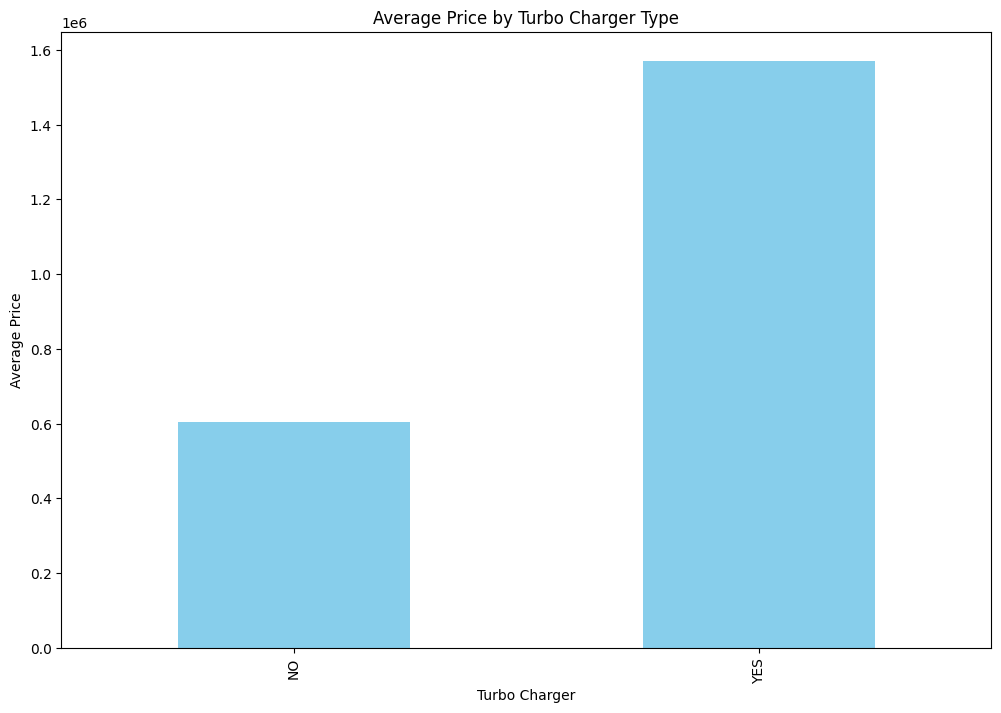

In [253]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('Turbo Charger')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger Type')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

Fuel Suppy System

In [226]:
print('null values:',copy_cardekho['Fuel Suppy System'].isna().sum())
print('unique values:',copy_cardekho['Fuel Suppy System'].unique())
print('unique value and its occurance:',copy_cardekho['Fuel Suppy System'].value_counts())
print('no of unique elements:',copy_cardekho['Fuel Suppy System'].nunique())

null values: 1128
unique values: ['MPFi' 'Direct Injection' 'CRDI' 'GDi' 'MPFI' 'PGM - Fi'
 'Direct Injection ' nan 'PGM-Fi' 'Multi Point Fuel Injection' 'MPFI+LPG'
 'CRDi' 'Common-Rail type' 'Common Rail Direct Injection (dCi)' 'CDI'
 'EFI(Electronic Fuel Injection)' 'MPFI ' 'Electronic Fuel Injection'
 'TSI' 'Multi point Fuel Injection' 'MPI' 'Gasoline Direct Injection'
 'MPi' 'Common Rail' 'SEFI' 'Dual VVT-i'
 'PGM-FI (Programmed Fuel Injection)' 'EFI (Electronic Fuel Injection)'
 'GDI' 'Mpfi' 'DEDST' 'CNG' 'Intelligent-Gas Port Injection'
 'gasoline direct injection' 'ISG' 'MPFI+CNG' 'Common-Rail Type'
 'Direct Injectio']
unique value and its occurance: Fuel Suppy System
MPFI                                  1820
MPFi                                   690
CRDI                                   566
Direct Injection                       507
CRDi                                   480
PGM-Fi                                 199
PGM - Fi                               156
GDi            

In [227]:
copy_cardekho.drop('Fuel Suppy System',axis=1,inplace=True)

variantName

In [222]:
print('null values:',copy_cardekho['variantName'].isna().sum())
print('unique value and its occurance:',copy_cardekho['variantName'].value_counts())
print('no of unique elements:',copy_cardekho['variantName'].nunique())

null values: 0
unique value and its occurance: variantName
VXI                                           333
LXI                                           145
Sportz                                         96
VDI                                            78
Magna                                          77
VXI BS IV                                      69
Sportz 1.2                                     65
1.2 Delta                                      61
ZXI                                            59
i-VTEC VX                                      50
1.2 Zeta                                       49
i VTEC V                                       49
VXI BSVI                                       45
S MT                                           40
Asta 1.2                                       40
Zeta                                           37
Asta                                           35
VDi                                            33
i VTEC CVT VX                            

In [238]:
copy_cardekho=copy_cardekho.copy()

In [223]:
copy_cardekho.drop('variantName',axis=1,inplace=True)

model

In [221]:
print('null values:',copy_cardekho['model'].isna().sum())
print('unique value and its occurance:',copy_cardekho['model'].value_counts())
print('no of unique elements:',copy_cardekho['model'].nunique())

null values: 0
unique value and its occurance: model
Honda City                           366
Maruti Swift                         348
Hyundai i20                          328
Maruti Baleno                        292
Hyundai Grand i10                    259
Maruti Wagon R                       250
Maruti Swift Dzire                   250
Hyundai Creta                        193
Hyundai Verna                        181
Hyundai i10                          180
Honda Amaze                          175
Ford Ecosport                        166
Maruti Alto 800                      163
Maruti Celerio                       151
Renault KWID                         149
Volkswagen Polo                      144
Mahindra XUV500                      127
Maruti Ciaz                          126
Honda Jazz                           112
Jeep Compass                         103
Tata Tiago                            96
Kia Seltos                            93
Maruti Vitara Brezza                  91
Tata

In [225]:
model_count=copy_cardekho['model'].value_counts()
# Define threshold
threshold = len(copy_cardekho) * 0.005
# Identify categories to keep and filter 
categories_to_keep_oem = model_count[model_count >= threshold].index
copy_cardekho = copy_cardekho[copy_cardekho['model'].isin(categories_to_keep_oem)]
copy_cardekho.shape

(5990, 28)

oem

In [224]:
oem_counts=copy_cardekho['oem'].value_counts()
# Define threshold
threshold = len(copy_cardekho) * 0.005
# Identify categories to keep and filter 
categories_to_keep_oem = oem_counts[oem_counts >= threshold].index
copy_cardekho = copy_cardekho[copy_cardekho['oem'].isin(categories_to_keep_oem)]
copy_cardekho.shape

(8114, 28)

In [220]:
print('null values:',copy_cardekho['oem'].isna().sum())
print('unique value and its occurance:',copy_cardekho['oem'].value_counts())
print('no of unique elements:',copy_cardekho['oem'].nunique())

null values: 0
unique value and its occurance: oem
Maruti                2226
Hyundai               1636
Honda                  856
Tata                   429
Mahindra               373
Toyota                 323
Renault                309
Ford                   307
Volkswagen             286
Mercedes-Benz          244
BMW                    182
Skoda                  159
Audi                   156
Kia                    156
Jeep                   112
MG                      88
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  34
Fiat                    30
Mitsubishi              13
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64
no of unique elements: 33


ft

In [212]:
copy_cardekho['ft']=copy_cardekho['ft'].replace('Cng','Gas')
copy_cardekho['ft']=copy_cardekho['ft'].replace('Lpg','Gas')

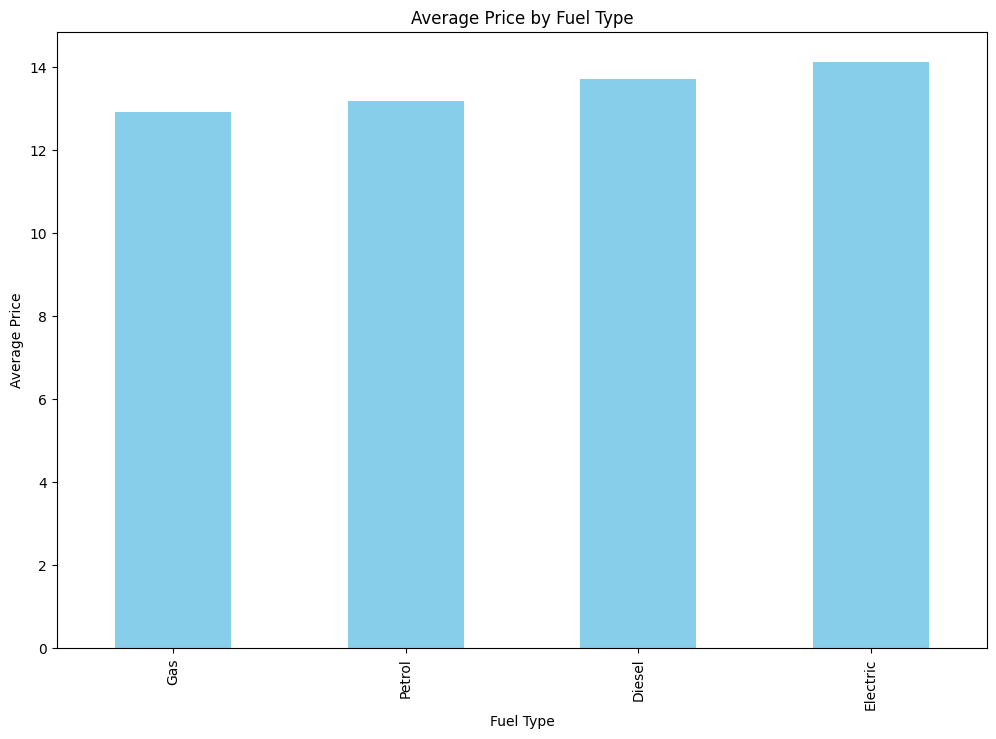

In [213]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('ft')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


bt

In [209]:
copy_cardekho['bt'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [127]:
b_type={'Maruti Eeco':'Wagon','Toyota Vellfire':'MUV'}
# Applying the updated mapping to the RTO column
#copy_cardekho['bt'] = copy_cardekho['bt'].map(b_type).fillna('Unknown')
copy_cardekho['bt'].unique()

array(['Unknown'], dtype=object)

In [215]:
copy_cardekho.drop('bt',axis=1,inplace=True)

Engine Type

In [112]:
copy_cardekho['Engine Type'].unique()

array(['K10B Engine', 'Ti-VCT Petrol Engine', 'Revotron Engine',
       'Kappa VTVT Petrol Engine', 'DDiS 200 Diesel Engine',
       '2.0-Litre 4-Cyl Multijet II Engine', 'Petrol Engine', nan,
       'k15B VVT Engine', 'VVT Petrol Engine', 'i-VTEC Petrol Engine',
       'mHawk Diesel Engine', 'U2 CRDI Diesel Engine',
       '1.2l Turbocharged Revotron Engine', 'i VTEC Engine',
       'In-Line Engine', 'K Series Dual jet', '1.5L Petrol',
       'V-Type Petrol Engine', '1.1 litre Petrol Engine', 'Bifuel Engine',
       'In-Line Petrol Engine', 'TDI Diesel Engine',
       '2.0L Multijet Diesel', '1.2L Kappa Dual VTVT Petrol',
       'K10B Petrol Engine', 'K15 Smart Hybrid',
       'TwinPower Turbo Inline 4 Cylinder Engine', '4 Cylinders In-line',
       'Dual VTVT Petrol Engine', 'In Line Diesel Engine',
       'F8D Petrol Engine', 'mHawk CRDe Engine', 'Smartstream G1.4',
       '3.0 L in-line 6 cylinder engine', 'V-Type Diesel Engine',
       'Kryotec 2.0 L Turbocharged Engine',
       '

In [113]:
copy_cardekho.drop('Engine Type', axis=1,inplace=True)


Insurance Validity

In [107]:
copy_cardekho['Insurance Validity'].unique()
copy_cardekho['Insurance Validity']=copy_cardekho['Insurance Validity'].replace('Third Party insurance','Third Party')
copy_cardekho['Insurance Validity'].value_counts()

Insurance Validity
Third Party      4604
Comprehensive    3146
Zero Dep          303
Not Available     223
1                   3
2                   1
Name: count, dtype: int64

In [108]:
copy_cardekho = copy_cardekho[~copy_cardekho['Insurance Validity'].isin(['1', '2'])]
copy_cardekho['Insurance Validity'].fillna('Not Available', inplace=True)
copy_cardekho['Insurance Validity'].value_counts()


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4884\1187694803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_cardekho['Insurance Validity'].fillna('Not Available', inplace=True)
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_4884\1187694803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_cardekho['Insurance Validity'].fillna('Not

Insurance Validity
Third Party      4604
Comprehensive    3146
Zero Dep          303
Not Available     227
Name: count, dtype: int64

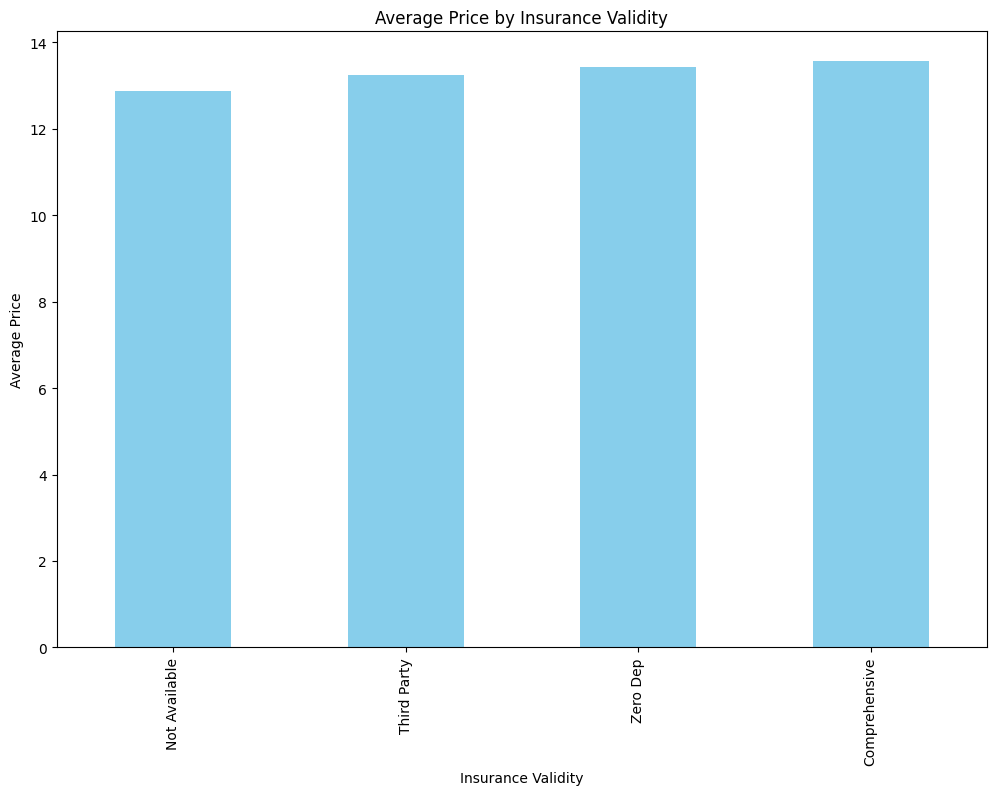

In [109]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('Insurance Validity')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()


color

In [98]:
#Color
copy_cardekho['Color'] = copy_cardekho['Color'].apply(lambda x: str(x).lower())

In [ ]:
copy_cardekho['Color'].unique()

In [101]:
color_dict = {
    'white': 'White',
    'red': 'Red',
    'others': 'Other',
    'gray': 'Gray',
    'grey': 'Gray',
    'maroon': 'Other',
    'orange': 'Other',
    'silver': 'Silver',
    'blue': 'Blue',
    'brown': 'Brown',
    'yellow': 'Other',
    'black': 'Black',
    'golden': 'Gold',
    'green': 'Other',
    'o purple': 'Purple',
    'nan': 'Other',
    'other': 'Other',
    'gold': 'Gold',
    'titanium grey': 'Gray',
    'violet': 'Purple',
    'modern steel metallic': 'Silver',
    'platinum white': 'White',
    'golden brown': 'Brown',
    'aurora black pearl': 'Black',
    'beige': 'Other',
    'star dust': 'Black',
    'flash red': 'Red',
    'purple': 'Purple',
    'platinum white pearl': 'White',
    'wine red': 'Red',
    'taffeta white': 'White',
    'minimal grey': 'Gray',
    'fiery red': 'Red',
    't wine': 'Other',
    'prime star gaze': 'Other',
    'tafeta white': 'White',
    'p black': 'Black',
    'metall': 'Silver',
    'met ecru beige': 'Other',
    'copper': 'Other',
    'titanium': 'Other',
    'chill': 'Other',
    'burgundy': 'Other',
    'lunar silver metallic': 'Silver',
    'silky silver': 'Silver',
    'berry red': 'Red',
    'premium amber metallic': 'Other',
    'r earth': 'Other',
    'platinum silver': 'Silver',
    'orchid white pearl': 'White',
    'carnelian red pearl': 'Red',
    'polar white': 'White',
    'medium blue': 'Blue',
    'alabaster silver metallic': 'Silver',
    'carbon steel': 'Other',
    'cavern grey': 'Gray',
    'espreso_brwn': 'Brown',
    'pearl white': 'White',
    'magma grey': 'Gray',
    'dark red': 'Red',
    'falsa colour': 'Purple',
    'cherry': 'Red',
    'hip hop black': 'Black',
    'nexa blue': 'Blue',
    'passion red': 'Red',
    'cirrus white': 'White',
    'arizona blue': 'Blue',
    'galaxy blue': 'Blue',
    'modern steel metal': 'Silver',
    'burgundy red metallic': 'Red',
    'magma gray': 'Gray',
    'cbeige': 'Other',
    'goldan brwoon': 'Brown',
    'm grey': 'Gray',
    'b red': 'Red',
    'granite grey': 'Gray',
    'urban titanim': 'Other',
    'g brown': 'Brown',
    'rosso brunello': 'Other',
    'a silver': 'Silver',
    'b grey': 'Gray',
    'radiant red m': 'Red',
    'c bronze': 'Bronze',
    'champagne mica metallic': 'Other',
    'bold beige metallic': 'Other',
    'starry black': 'Black',
    'sleek silver': 'Silver',
    'symphony silver': 'Silver',
    'phantom black': 'Black',
    'metallic magma grey': 'Gray',
    'c brown': 'Brown',
    'metallic glistening grey': 'Gray',
    'superior white': 'White',
    'arctic silver': 'Silver',
    'urban titanium metallic': 'Other',
    'smoke grey': 'Gray',                                        #'Gold'
    'pearl arctic white': 'White',
    'bright silver': 'Silver',
    'porcelain white': 'White',
    'coral white': 'White',
    'diamond white': 'White',
    'brick red': 'Red',
    'mediterranean blue': 'Blue',      #'Black'
    'mist silver': 'Silver',
    'gravity gray': 'Gray',
    'candy white': 'White',
    'metallic premium silver': 'Silver',
    'glistening grey': 'Gray',
    'super white': 'White',
    'deep black pearl': 'Black',
    'twilight blue': 'Blue',
    'caviar black': 'Black',
    'pearl met. arctic white': 'White',
    'metallic silky silver': 'Silver',
    'pure white': 'White',
    'stardust': 'Other',
    'alabaster silver metallic - amaze': 'Silver',
    'ray blue': 'Blue',               #'Black'
    'glacier white pearl': 'White',
    'outback bronze': 'Bronze',
    'solid fire red': 'Red',
    'daytona grey': 'Gray',
    'metallic azure grey': 'Gray',
    'moonlight silver': 'Silver',
    'fire brick red': 'Red',
    'cashmere': 'Other',
    'pearl snow white': 'White',
    'light orange': 'Other',
    'foliage': 'Other',
    'sky blue': 'Blue',
    'off white': 'White',
    'bronze': 'Bronze',
    'parpel': 'Purple',
    'cherry red': 'Red',
    'sunset red': 'Red',
    'silicon silver': 'Silver',
    'dark blue': 'Blue',
    'technometgrn+gryroof': 'Gray',
    'light silver': 'Silver',
    'out back bronze': 'Bronze',
}

# Applying the updated mapping to the Color column
copy_cardekho['Color'] = copy_cardekho['Color'].map(color_dict).fillna('Other')
copy_cardekho['Color'].unique()

array(['White', 'Red', 'Other', 'Gray', 'Silver', 'Blue', 'Brown',
       'Black', 'Gold', 'Purple', 'Bronze'], dtype=object)

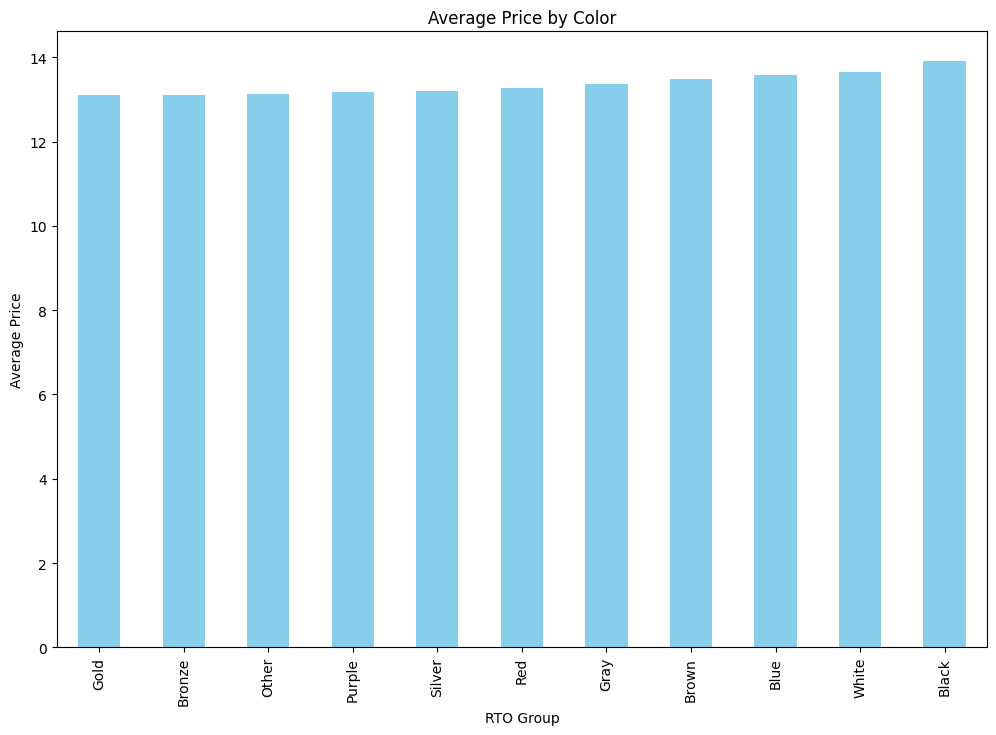

In [104]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('Color')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Color')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

Location

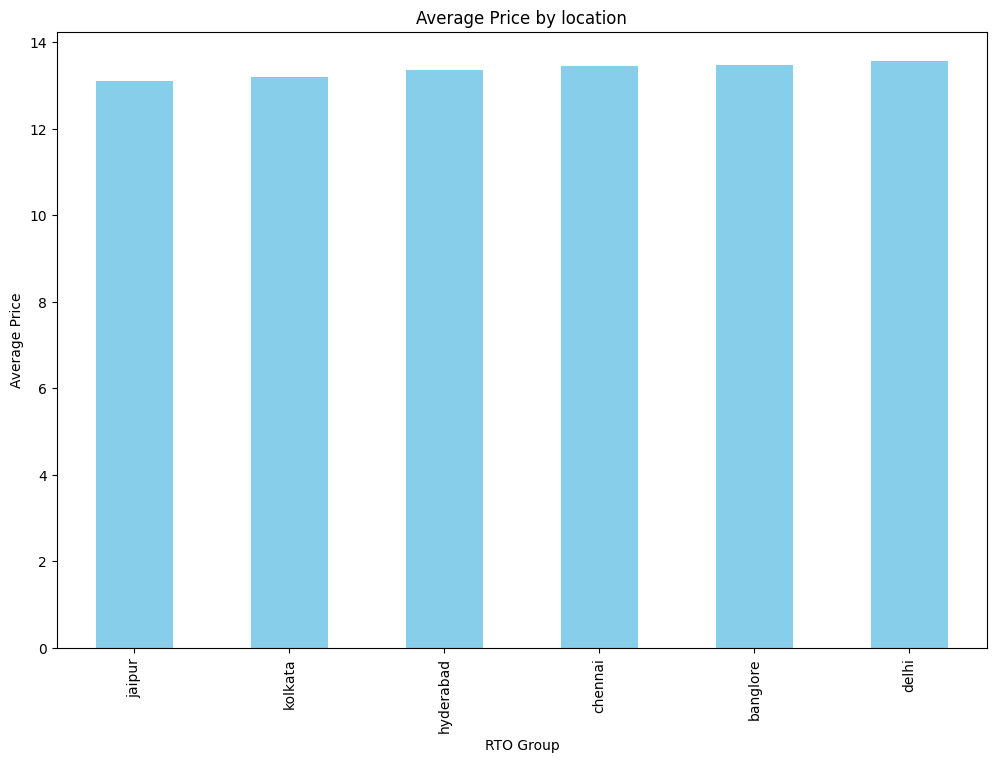

In [103]:
#location
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('location')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by location')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

In [ ]:
#